In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from len import infinite_len_ab, finite_len_ab,\
      bool_conv, inv_bool_conv
infapprox =infinite_len_ab()
%matplotlib widget
import warnings
# warnings.filterwarnings("error")
# # !pip install -U ipympl

In [ ]:
p = 0.0
n0 = 110
NPTS = 200
qh_min = 1/4
ALPHA = 0.5
qh = np.linspace(qh_min+0.01, 0.5, NPTS)
r = np.linspace(p, 0.499, NPTS)
s_min = np.zeros((NPTS, NPTS))
l_min = np.zeros((NPTS, NPTS))
s = np.linspace(0, 0.5, NPTS)
# D = (1 - (2*q) )

In [ ]:
for i, rr in enumerate(r):
    for j , qq in enumerate(qh):
        # print(f'rr qq :', rr, qq)
        q_tmp = bool_conv(bool_conv(qq,  p ),p)
        rh = inv_bool_conv(p,rr)
        sm = min(1-(1-2*qq)/ALPHA, 2*rh)
        assert np.isscalar(sm)
        s  = np.linspace(0, sm, num = NPTS )
        # print(s/2>inv_bool_conv(p,rr))
        # print(inv_bool_conv(p,rr), sm, 2*rr)
        # print(inv_bool_conv(rr,p))
        l_s = infapprox.len(q = q_tmp, n0 = n0, p = p,
                            r= rr, s = s, alpha=ALPHA)
        minind = np.argmin( l_s )
        assert np.isscalar(minind)
        s_min[i, j] = s[minind]
        l_min[i, j] = l_s[minind]

In [ ]:
Q, R  = np.meshgrid(qh ,r)
mask = l_min <=0
Z = np.ma.masked_array(l_min, mask)

#### Finding $\alpha_{min}$

In [ ]:
# #
# for i, rr in enumerate(r):
#     for j , qq in enumerate(q):
        
#         alpha = np.linspace(1-2*q, 0.5, NPTS)
#         lm = np.zeros_like(alpha)
#         for k,ALPHA in enumerate(alpha):
#             sm = min(1-(1-2*qq)/ALPHA, 2*rr)
#             assert np.isscalar(sm)
#             s  = np.linspace(0, sm, num = NPTS )
#             l_s = infapprox.len(q = qq, n0 = n0, p = p,
#                                 r= rr, s = s, alpha=ALPHA)
#             assert l_s.shape == s.shape
            
#             assert np.isscalar(minind)
#             lm[k] = np.min(l_s)
#         minind = np.argin(lm)

#             # s_min[i, j] = s[minind]
#             # l_min[i, j] = l_s[minind]


In [ ]:
# %matplotlib widget
# %matplotlib inline
plt.clf()
fig, axs = plt.subplots(1, 2 , constrained_layout = True)
map = axs[1].imshow(s_min, origin = 'lower', extent=[qh[0], qh[-1], r[0], r[-1]], aspect='equal')
axs[1].set_title(r'$s_{min}$')
plt.colorbar(mappable= map, ax = axs[0],  shrink = 0.7)
map = axs[0].imshow(Z, origin = 'lower', extent=[qh[0], qh[-1], r[0], r[-1]], aspect='equal')
plt.colorbar(mappable= map, ax = axs[1], shrink = 0.7)
# axs[0].imshow(mask, cmap = 'grey', origin = 'lower', extent=[q[0], q[-1], r[0], r[-1]], aspect = 'equal', alpha = 0.3)

axs[0].contour(Q,R, l_min, colors = ['white'])
# axs[0].contourf(Q,R, mask, colors = ['white'])
axs[0].set_title(r'$l_{min}$')
axs[0].set_xlabel(r'$\hat{q}\to$')
axs[0].set_ylabel(r'$r\to$')

axs[1].set_xlabel(r'$\hat{q}\to$')
axs[1].set_ylabel(r'$r\to$')
plt.show()

In [ ]:
plt.close()

# Finite Length Approximation
    

In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from len import infinite_len_ab, finite_len_ab,\
      bool_conv, inv_bool_conv


warn_ = 'default'
# warn_ = 'error'
warnings.filterwarnings(warn_)

fapprox =finite_len_ab()
p = 0.0
n0 = 110
NPTS = 150
qh_min = 1/4
ALPHA = 0.5
qh = np.linspace(qh_min+0.01, 0.5, NPTS)
r = np.linspace(p, 0.499, NPTS)
s_min = np.zeros((NPTS, NPTS))
l_min = np.zeros((NPTS, NPTS))
s = np.linspace(0, 0.5, NPTS)
# D = (1 - (2*q) )

for i, rr in enumerate(r):
    for j , qq in enumerate(qh):
        q_tmp = bool_conv(p,bool_conv(qq, p))
        rh = inv_bool_conv(p, rr)
        # print(rh)
        sm = min(1-(1-2*q_tmp)/ALPHA, 2*rh ) # bool_conv(rh, rh))
        assert np.isscalar(sm)
        s  = np.linspace(0, sm, num = NPTS )
        l_s = fapprox.len(q = q_tmp, n0 = n0, p = p,
                            r= rr, s = s, alpha=ALPHA)
        assert l_s.shape == s.shape
        
        minind = np.argmin( l_s )
        assert np.isscalar(minind)
        s_min[i, j] = s[minind]
        l_min[i, j] = l_s[minind]


Q, R  = np.meshgrid(qh ,r)
mask = l_min <=0
Z = np.ma.masked_array(l_min, mask)

Initialised the finite length class


In [2]:
l_min

array([[187.81705779, 188.34965838, 188.87799603, ..., 225.92626805,
        225.9312089 , 225.93285584],
       [180.69875665, 181.23135724, 181.7596949 , ..., 218.80796691,
        218.81290777, 218.81455471],
       [175.05618722, 175.58878781, 176.11712546, ..., 213.16539748,
        213.17033833, 213.17198527],
       ...,
       [ 51.1845099 ,  48.54945548,  46.05935319, ...,   5.96561415,
          5.97055501,   5.97220195],
       [ 51.17117029,  48.53602573,  46.04583207, ...,   5.94131057,
          5.943523  ,   5.94516994],
       [ 51.16524761,  48.53006303,  46.03982881, ...,   5.93000934,
          5.93184786,   5.93524493]], shape=(150, 150))

/Users/himanshusingh/.pyenv/versions/3.10.12/lib/python3.10/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


Text(0, 0.5, '$r\\to$')

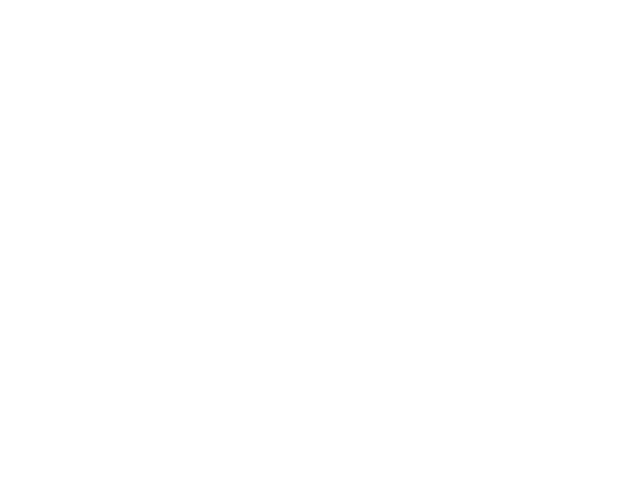

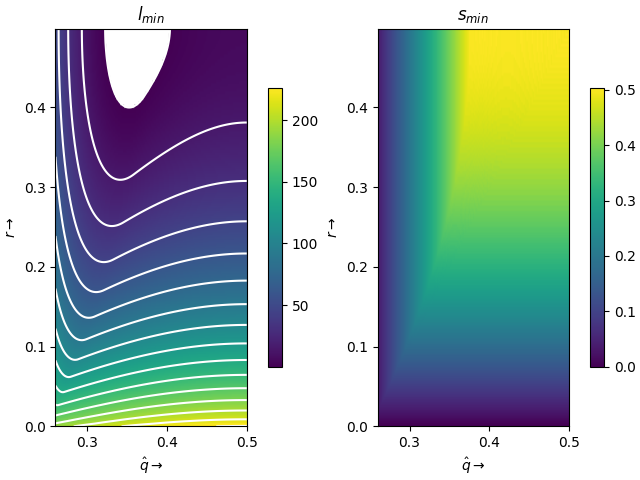

In [2]:
%matplotlib widget
plt.clf()
fig, axs = plt.subplots(1, 2 , constrained_layout = True)
map = axs[1].imshow(s_min, origin = 'lower', extent=[qh[0], qh[-1], r[0], r[-1]]) #, aspect='equal')
axs[1].set_title(r'$s_{min}$')
plt.colorbar(mappable= map, ax = axs[1],  shrink = 0.7)
map = axs[0].imshow(Z, origin = 'lower', extent=[qh[0], qh[-1], r[0], r[-1]]) #, aspect='equal')
plt.colorbar(mappable= map, ax = axs[0], shrink = 0.7)
# axs[0].imshow(mask, cmap = 'grey', origin = 'lower', extent=[q[0], q[-1], r[0], r[-1]], aspect = 'equal', alpha = 0.5)

axs[0].contour(Q,R, l_min, colors = ['white'], levels = 20)
axs[0].set_title(r'$l_{min}$')
axs[0].set_xlabel(r'$\hat{q}\to$')
axs[0].set_ylabel(r'$r\to$')

axs[1].set_xlabel(r'$\hat{q}\to$')
axs[1].set_ylabel(r'$r\to$')
# plt.show()

In [ ]:
help(plt.contour)

In [ ]:
plt.close()

In [ ]:
import pickle 
savey = {'alpha': ALPHA, 'qhat':qh , 'r':r , 'lmin': l_min, 'smin': s_min, 'n0': n0, 'p':p, 'npts': NPTS}
with open('finit_alpha_one_half', 'wb') as f:
    pickle.dump(savey, f)

In [ ]:
import pickle
with open('finit_alpha_one_half', 'rb') as f:
    data = pickle.load(f)
l_min = data['lmin']
s_min = data['smin']
qh = data['qhat']
r = data['r']
print(data['p'])

In [ ]:

Q, R  = np.meshgrid(qh ,r)
mask = l_min <=0
Z = np.ma.masked_array(l_min, mask)